In [5]:
from qiskit import *
from qiskit.visualization import *
from math import pi, sqrt
import numpy as np

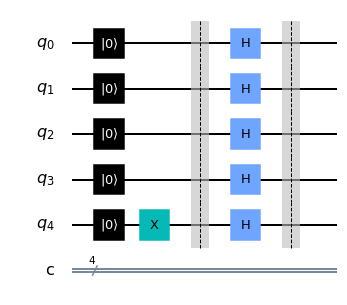

In [36]:
# n = int(input('Enter number of required qubits: '))
n = 4 

circuit = QuantumCircuit(n+1, n)    # Add one for ancillia qubit

circuit.reset(range(n+1))
circuit.x(n)
circuit.barrier()

circuit.h(range(n+1))
circuit.barrier()

circuit.draw('mpl')

1101


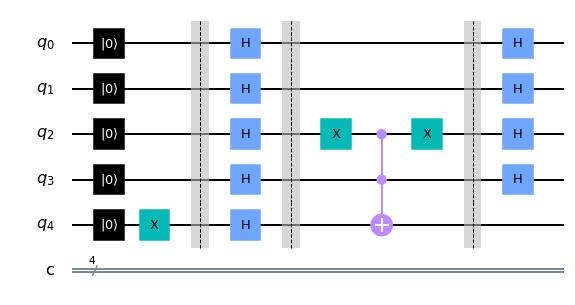

In [37]:
# target = int(input('Enter the target number: '))
target = 13
# max_n = 2**n
# target = np.random.randint(max_n)
# print(target)

target_binary = "{0:04b}".format(target)
print(target_binary)

# Grover's Oracle
for index, value in enumerate(target_binary):  
    if value == '0':
        circuit.x(n-index)    # Adding X gate to the qubit with |0> value. Also the order of qubits is reversed in Qiskit.

circuit.toffoli(n-2, n-1, n)
        
for index, value in enumerate(target_binary):  
    if value == '0':
        circuit.x(n-index)  
circuit.barrier()



circuit.h(range(n))
circuit.draw('mpl')